---
---

## Homework_02-regression

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

---

In [638]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

---

In [639]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

# !wget $data   # {do one time only}

In [640]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

---

In [641]:
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns]

df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [642]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

---

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

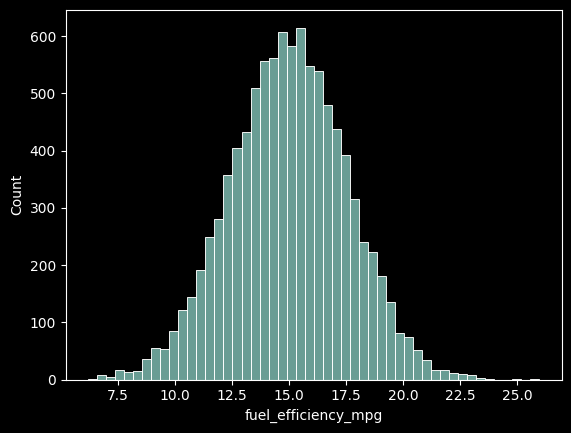

In [643]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

> No, it doesn't have a long tail (it is a normal distribution or a bell curve)

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

---

In [644]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

> horsepower

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

---

In [645]:
df.horsepower.median()

np.float64(149.0)

> 149

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

---

In [646]:
n = len(df)

n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

n, n_val + n_test + n_train

(9704, 9704)

In [647]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [648]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [649]:
len(df_train), len(df_val), len(df_test)

(5822, 1940, 1942)

In [650]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [651]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [652]:
len(y_train), len(y_val), len(y_test)

(5822, 1940, 1942)

In [653]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

---

In [654]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


In [655]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [656]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [657]:
def rmse(y_val, y_pred):
    error = y_val - y_pred
    se = error ** 2
    mse = se.mean()

    return np.sqrt(mse)

#### fill `0`

---

In [658]:
def prepare_X_0(df):
    df = df.fillna(0)
    X = df.values

    return X

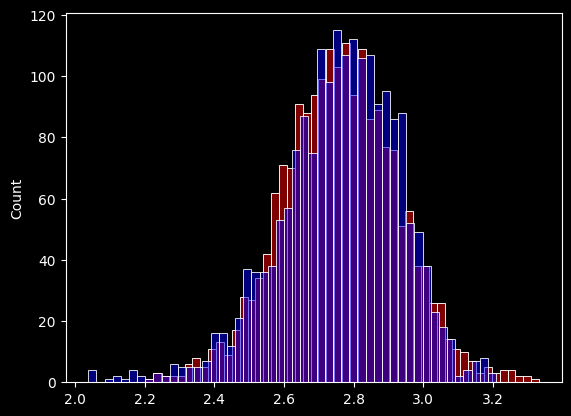

In [659]:
X_train = prepare_X_0(df_train)
X_val = prepare_X_0(df_val)

w0, w = train_linear_regression(X_train, y_train)

y_val_pred = w0 + X_val.dot(w)

sns.histplot(y_val_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

rmse_0 = rmse(y_val, y_val_pred)

In [660]:
round(rmse_0, 2)

np.float64(0.04)

#### fill mean

---

In [661]:
def prepare_X_mean(df):
    df = df.fillna(df.mean())
    X = df.values

    return X

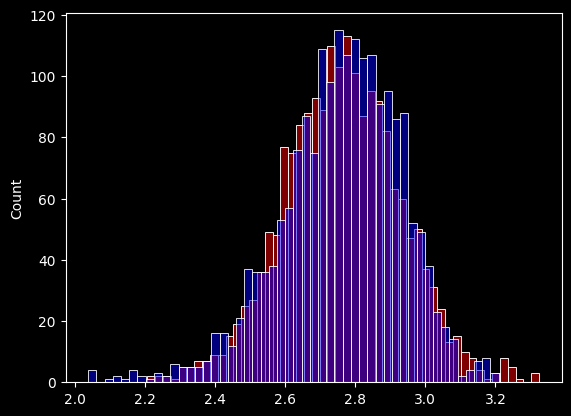

In [662]:
X_train = prepare_X_mean(df_train)
X_val = prepare_X_mean(df_val)

w0, w = train_linear_regression(X_train, y_train)

y_val_pred = w0 + X_val.dot(w)

sns.histplot(y_val_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

rmse_mean = rmse(y_val, y_val_pred)

In [663]:
round(rmse_mean, 2)

np.float64(0.04)

> Both are equally good {0.04}

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

---

In [664]:
def train_linear_regression_reg(X, y, r= 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [665]:
def prepare_X_0(df):
    df = df.fillna(0)
    X = df.values

    return X

In [666]:
reg = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in reg:
    X_train = prepare_X_0(df_train)
    X_val = prepare_X_0(df_val)

    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(r, round(score, 2))

0 0.04
0.01 0.04
0.1 0.04
1 0.04
5 0.04
10 0.04
100 0.04


> 0

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

---

In [667]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RMSE_scores = []

for s in seed:
    # Data Preparation
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    # Model Training and Evaluation
    X_train = prepare_X_0(df_train)
    X_val = prepare_X_0(df_val)

    w0, w = train_linear_regression(X_train, y_train)

    y_val_pred = w0 + X_val.dot(w)

    rmse_0 = rmse(y_val, y_val_pred)

    RMSE_scores.append(rmse_0)

In [668]:
std = np.std(RMSE_scores)
round(std, 3)

np.float64(0.001)

> 0.001

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

#### Spit dataset

In [669]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [670]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [671]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [672]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [673]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

#### Combine train & validation into full train

In [674]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

### Modeling with Linear Regression with fillna 0 and reg 0.001

In [675]:
X_full_train = prepare_X_0(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [676]:
X_test = prepare_X_0(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

np.float64(0.039179861822701244)

In [677]:
# Inverse transform sebelum RMSE akhir
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)
rmse_actual = rmse(y_test_actual, y_pred_actual)
round(rmse_actual, 3)

np.float64(0.607)

> 0.515 {Honestly i don't know the standard anymore} {{0.607}}

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02
* If your answer doesn't match options exactly, select the closest one

---
---